# Bitcoin Data Time Series Analysis

## Importing Libraries and the Bitcoin Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
from prophet.plot import plot_plotly

df = pd.read_csv('https://raw.githubusercontent.com/joao-pedro-dp/Bitcoin_Price_Time_Series/refs/heads/main/BTC-USD_2020-2025.csv')

In [4]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1830 non-null   object
 1   Close   1829 non-null   object
 2   High    1829 non-null   object
 3   Low     1829 non-null   object
 4   Open    1829 non-null   object
 5   Volume  1829 non-null   object
dtypes: object(6)
memory usage: 85.9+ KB


## Defining the Columns and Checking the Data

In [6]:
df = df.iloc[2:].reset_index(drop=True)
df.rename(columns={'Price': 'Date'}, inplace=True)
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
1,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
3,2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
4,2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1828 non-null   object
 1   Close   1828 non-null   object
 2   High    1828 non-null   object
 3   Low     1828 non-null   object
 4   Open    1828 non-null   object
 5   Volume  1828 non-null   object
dtypes: object(6)
memory usage: 85.8+ KB


I need to convert the date column to datetime.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
cols = ['Close', 'High', 'Low', 'Open', 'Volume']
df[cols] = df[cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1828 non-null   datetime64[ns]
 1   Close   1828 non-null   float64       
 2   High    1828 non-null   float64       
 3   Low     1828 non-null   float64       
 4   Open    1828 non-null   float64       
 5   Volume  1828 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 85.8 KB


In [9]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Month_Year'] = df['Date'].dt.to_period('M')
df['Variation'] = df['Close'] - df['Open']
df['Variation (%)'] = (df['Close'] - df['Open']) / df['Open'] * 100

df.head()

,Date,Close,High,Low,Open,Volume,Day,Month,Quarter,Month_Year,Variation,Variation (%)
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10,1,1,1,2020-01,5.282227,0.073416
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10,2,1,1,2020-01,-217.081055,-3.013947
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10,3,1,1,2020-01,360.455566,5.160845
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10,4,1,1,2020-01,65.281250,0.888739
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10,5,1,1,2020-01,0.865723,0.011682


In [10]:
df.isnull().sum()

Date             0
Close            0
High             0
Low              0
Open             0
Volume           0
Day              0
Month            0
Quarter          0
Month_Year       0
Variation        0
Variation (%)    0
dtype: int64

In [11]:
df.duplicated().sum()

0

The df doesn't have any duplicates or null values, so I can continue with the EDA

## Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1828 non-null   datetime64[ns]
 1   Close          1828 non-null   float64       
 2   High           1828 non-null   float64       
 3   Low            1828 non-null   float64       
 4   Open           1828 non-null   float64       
 5   Volume         1828 non-null   float64       
 6   Day            1828 non-null   int32         
 7   Month          1828 non-null   int32         
 8   Quarter        1828 non-null   int32         
 9   Month_Year     1828 non-null   period[M]     
 10  Variation      1828 non-null   float64       
 11  Variation (%)  1828 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(3), period[M](1)
memory usage: 150.1 KB


Which quarter had the highest closing price and volume of transactions?

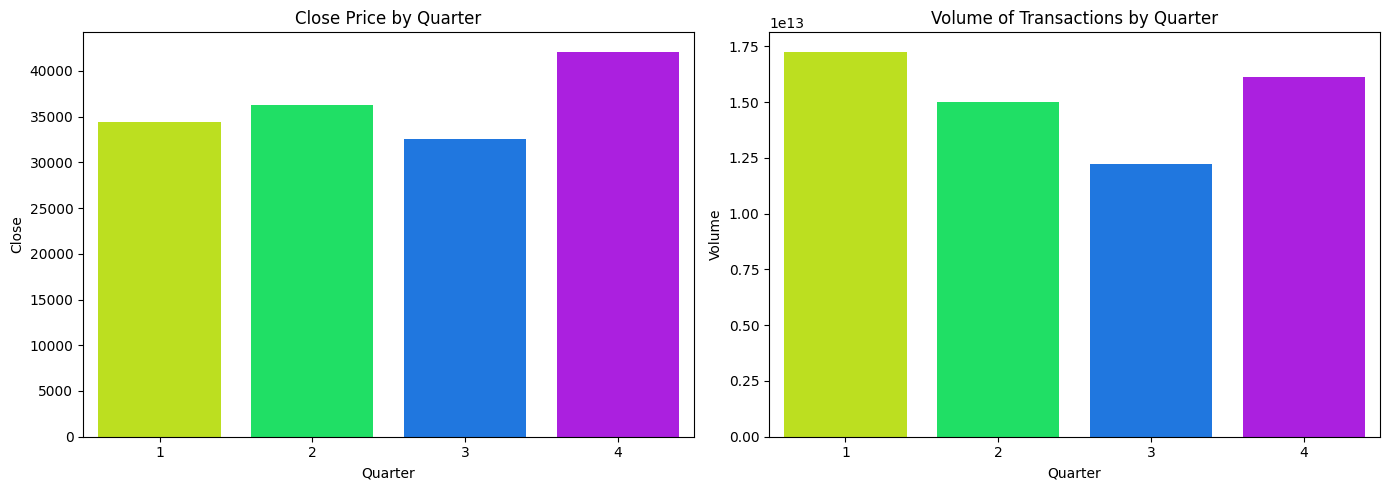

In [13]:
df_Quarter_close = df.groupby(['Quarter'])['Close'].mean().reset_index()

df_Quarter_vol = df.groupby(['Quarter'])['Volume'].sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette("hsv", 4)
sns.barplot(data=df_Quarter_close, x="Quarter",y='Close', palette=colors, hue='Quarter',legend=False, ax=axs[0])
axs[0].set_title('Close Price by Quarter')

sns.barplot(data=df_Quarter_vol, x="Quarter",y='Volume', palette= colors, hue='Quarter', legend=False, ax=axs[1])
axs[1].set_title('Volume of Transactions by Quarter')

plt.tight_layout()
plt.show()

The closing price was highest in the fourth quarter, but the volume was highest in the first.

Which month had the highest closing price and volume of transactions?

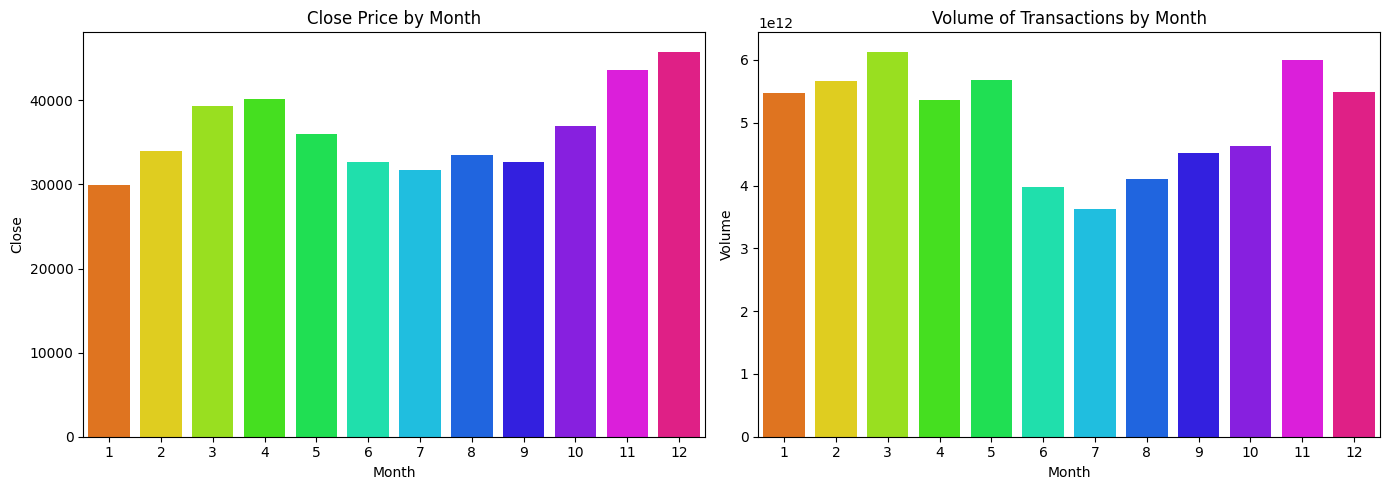

In [14]:
df_Month_close = df.groupby(['Month'])['Close'].mean().reset_index()

df_Month_vol = df.groupby(['Month'])['Volume'].sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette("hsv", 12)
sns.barplot(data=df_Month_close, x="Month",y='Close', palette=colors, hue='Month',legend=False, ax=axs[0])
axs[0].set_title('Close Price by Month')

sns.barplot(data=df_Month_vol, x="Month",y='Volume', palette= colors, hue='Month', legend=False, ax=axs[1])
axs[1].set_title('Volume of Transactions by Month')

plt.tight_layout()
plt.show()

The closing price was highest in December, but the volume was highest in March. It is worth highlighting that the two columns seem to be highly correlated.

Which month and quarter had the highest variation of price?

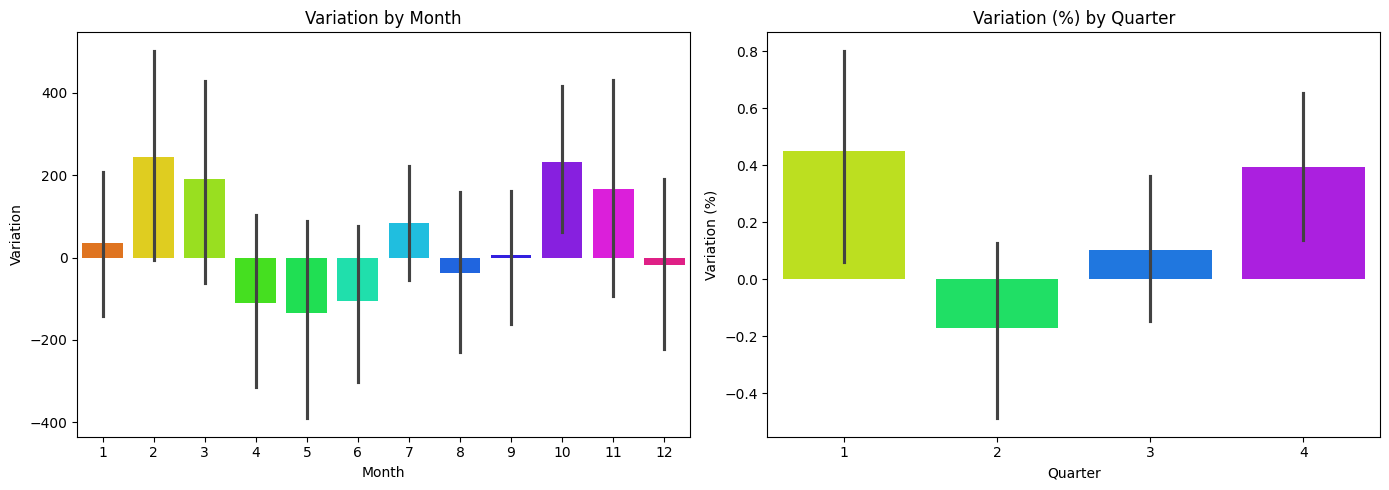

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette("hsv", 12)
sns.barplot(data=df, x="Month", y='Variation', ax=axs[0], palette= colors, hue='Month', legend=False)
axs[0].set_title('Variation by Month')

colors2 = sns.color_palette("hsv", 4)
sns.barplot(data=df, x="Quarter", y='Variation (%)', ax=axs[1], palette= colors2, hue='Quarter', legend=False)
axs[1].set_title('Variation (%) by Quarter')

plt.tight_layout()
plt.show()

Which day of month had the lowest closing price and volume of transactions?

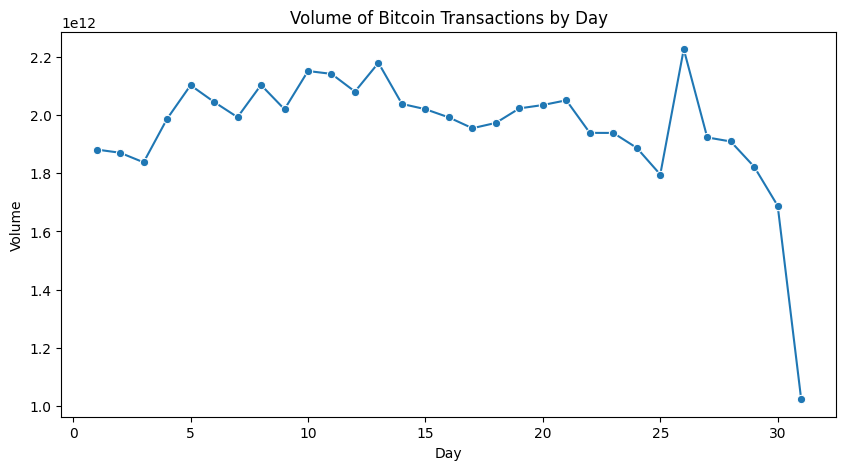

In [16]:
df_day = df.groupby('Day')['Volume'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_day, x='Day', y='Volume', marker='o')
plt.title('Volume of Bitcoin Transactions by Day')
plt.show()

In [17]:
corre = df[['Close','High',	'Low', 'Open', 'Volume'	]].corr()
corre

,Close,High,Low,Open,Volume
Close,1.000000,0.999183,0.998982,0.998047,0.294640
High,0.999183,1.000000,0.998381,0.999099,0.309244
Low,0.998982,0.998381,1.000000,0.998658,0.275106
Open,0.998047,0.999099,0.998658,1.000000,0.296029
Volume,0.294640,0.309244,0.275106,0.296029,1.000000


All the correlations are extremely strong, and when Bitcoin rises, the transaction volume grows slightly more than the other variables.

In [18]:
df.describe()

,Date,Close,High,Low,Open,Volume,Day,Month,Quarter,Variation,Variation (%)
count,1828,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,2022-07-02 12:00:00,36349.146233,37102.985466,35476.619460,36303.930634,3.317397e+10,15.727024,6.518053,2.507112,45.215598,0.192915
min,2020-01-01 00:00:00,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09,1.000000,1.000000,1.000000,-7563.996094,-37.186895
25%,2021-04-01 18:00:00,19621.888672,20122.888184,19253.855957,19604.723633,2.060821e+10,8.000000,4.000000,2.000000,-380.145996,-1.285273
50%,2022-07-02 12:00:00,32237.828125,33344.039062,31065.469727,32212.335938,2.992437e+10,16.000000,7.000000,3.000000,12.464844,0.062208
75%,2023-10-02 06:00:00,50745.096680,51938.328125,49073.281250,50693.987305,4.017934e+10,23.000000,10.000000,4.000000,476.580933,1.645934
max,2025-01-01 00:00:00,106140.601562,108268.445312,105291.734375,106147.296875,3.509679e+11,31.000000,12.000000,4.000000,8230.070312,18.797205
std,NaN,21157.704344,21597.996803,20648.114016,21127.310494,1.951143e+10,8.809135,3.451629,1.117828,1321.845041,3.350684


Ok, the EDA is not the objective of this project, so let's start with the prediction.

## Bitcoin Prediction

I wanna predict the close price, so I started using Prophet to do that.

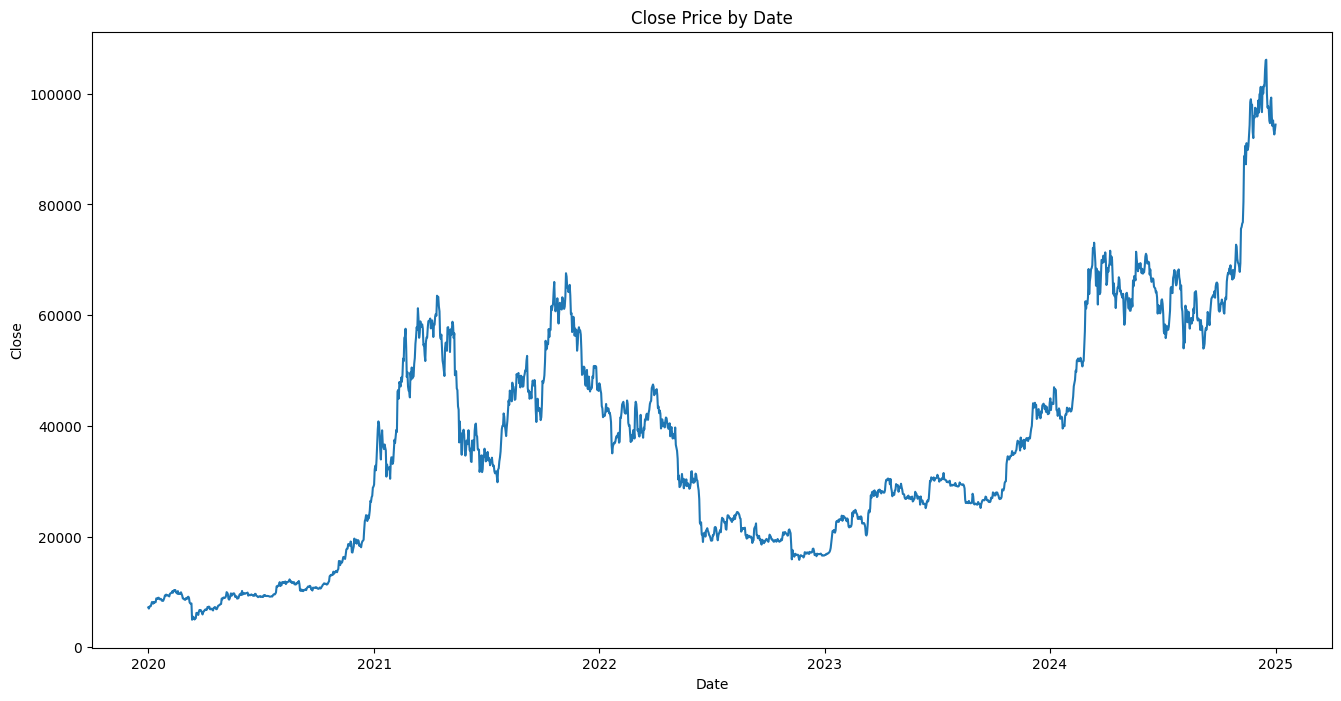

In [19]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Price by Date')
plt.show()

first, I need to rename the columns to ds and y

In [20]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y' })
df_prophet.head()

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383


after that, I just need to start the prediction

In [21]:
np.random.seed(4550)

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=90, freq='D')
predict = model.predict(future)

00:23:43 - cmdstanpy - INFO - Chain [1] start processing
00:23:43 - cmdstanpy - INFO - Chain [1] done processing


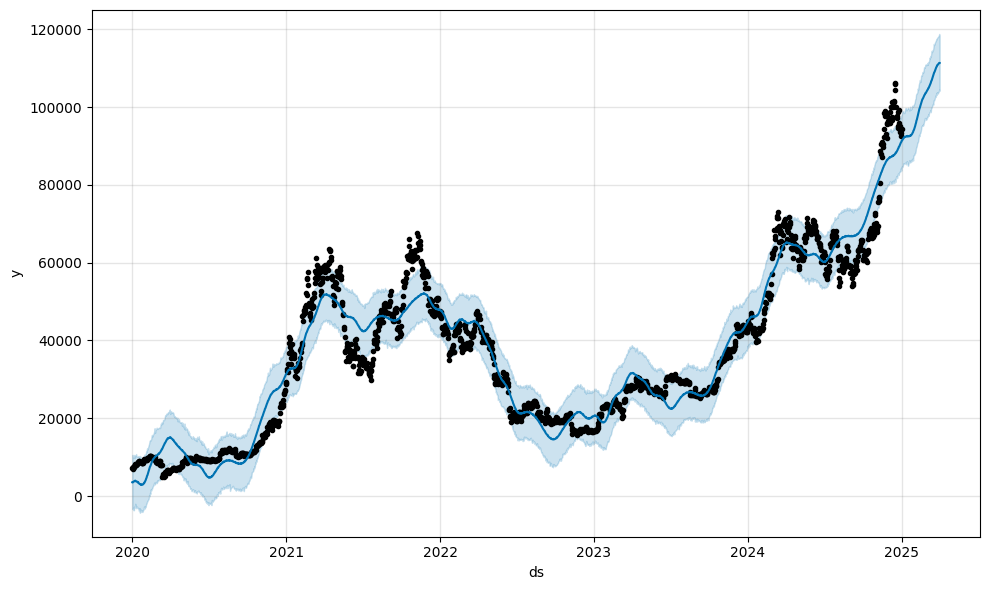

In [22]:
fig1 = model.plot(predict)

I wanna separate the test and train sets to evaluate the error.

In [23]:
df_prophet.shape

(1828, 2)

In [24]:
df_treino = pd.DataFrame()
df_treino['ds'] = df_prophet['ds'][:1463]
df_treino['y'] = df_prophet['y'][:1463]

df_teste = pd.DataFrame()
df_teste['ds'] = df_prophet['ds'][1463:]
df_teste['y'] = df_prophet['y'][1463:]

80% of the data is used for training and 20% for testing.

In [25]:
np.random.seed(4550)

model = Prophet(daily_seasonality=True)
model.fit(df_treino)

future = model.make_future_dataframe(periods=150, freq='D')
predict = model.predict(future)


00:23:44 - cmdstanpy - INFO - Chain [1] start processing
00:23:45 - cmdstanpy - INFO - Chain [1] done processing


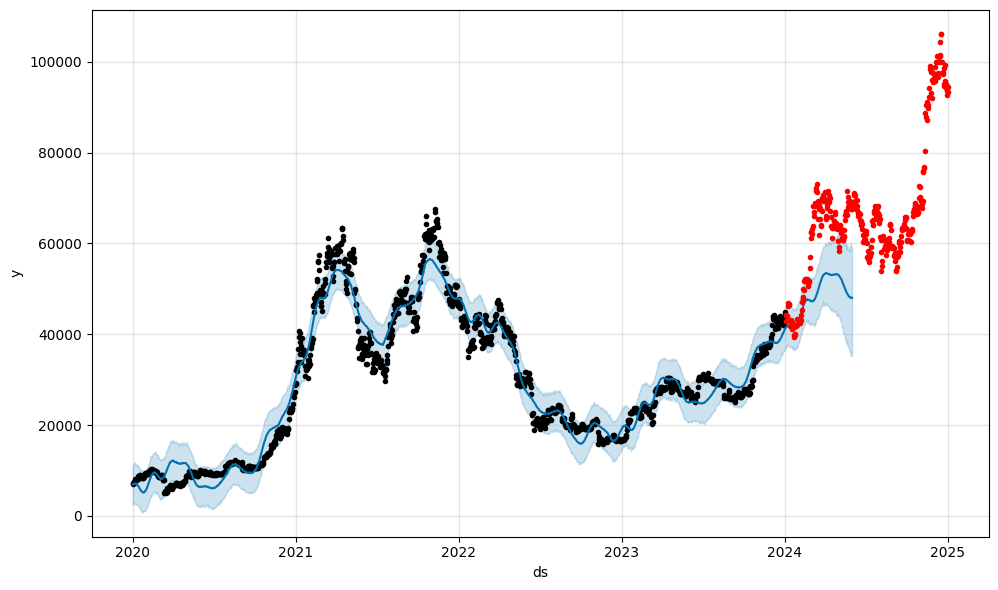

In [26]:
fig1 = model.plot(predict)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

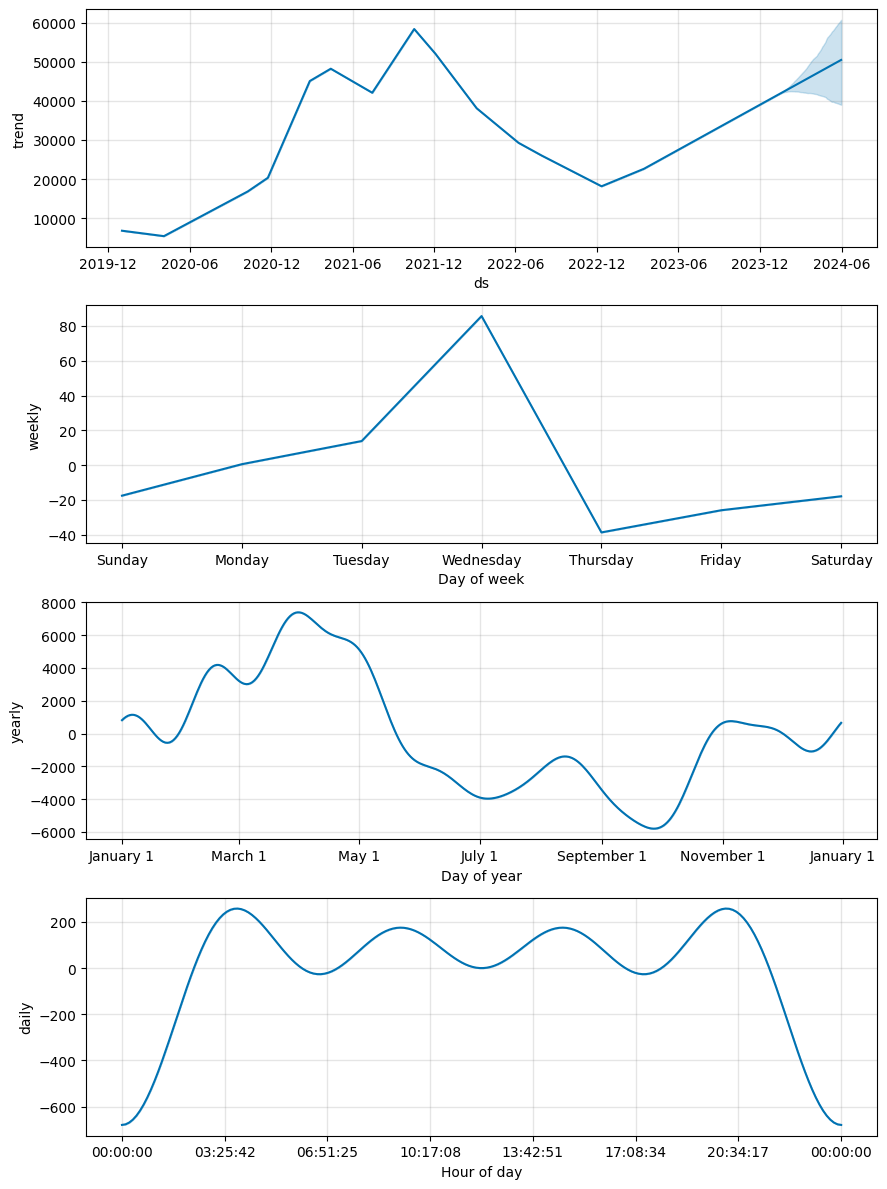

In [27]:
fig2 = model.plot_components(predict)

The train test seems pretty good. I will calculate the RSE to see if I need to change anything.

In [28]:
df_predict = predict[['ds','yhat']]

In [29]:
df_compare = pd.merge(df_teste, df_predict, on='ds')
df_compare

,ds,y,yhat
0,2024-01-03,42848.175781,41450.991366
1,2024-01-04,44179.921875,41474.218571
2,2024-01-05,44162.691406,41611.913557
3,2024-01-06,43989.195312,41720.772969
4,2024-01-07,43943.097656,41796.929005
...,...,...,...
145,2024-05-27,69394.554688,48125.834602
146,2024-05-28,68296.218750,48092.267353
147,2024-05-29,67578.093750,48132.985729
148,2024-05-30,68364.992188,47991.596162


In [30]:
mse = np.mean((df_compare['y'] - df_compare['yhat'])**2)
rse = np.sqrt(np.mean((df_compare['y'] - df_compare['yhat'])**2))
print(f'MSE: {mse}')
print(f'RSE: {rse}')

MSE: 159708588.0295099
RSE: 12637.586321347519


The RSE is quite high; let's try removing the outliers and see if it helps.

In [31]:
np.random.seed(4550)

model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=0)
predict = model.predict(future)

00:23:46 - cmdstanpy - INFO - Chain [1] start processing
00:23:47 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
no_outliers = df_prophet[(df_prophet['y'] > predict['yhat_lower']) & (df_prophet['y'] < predict['yhat_upper'])]

In [33]:
no_outliers

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383
...,...,...
1823,2024-12-28,95163.929688
1824,2024-12-29,93530.226562
1825,2024-12-30,92643.210938
1826,2024-12-31,93429.203125


In [34]:
df_treino = pd.DataFrame()
df_treino['ds'] = no_outliers['ds'][:1154]
df_treino['y'] = no_outliers['y'][:1154]

df_teste = pd.DataFrame()
df_teste['ds'] = no_outliers['ds'][1154:]
df_teste['y'] = no_outliers['y'][1154:]

80% of the data is used for training and 20% for testing again.

In [35]:
np.random.seed(4550)

model_no_outliers = Prophet(daily_seasonality=True)
model_no_outliers.fit(df_treino)

future = model_no_outliers.make_future_dataframe(periods=150, freq='D')
predict = model_no_outliers.predict(future)


00:23:47 - cmdstanpy - INFO - Chain [1] start processing
00:23:48 - cmdstanpy - INFO - Chain [1] done processing


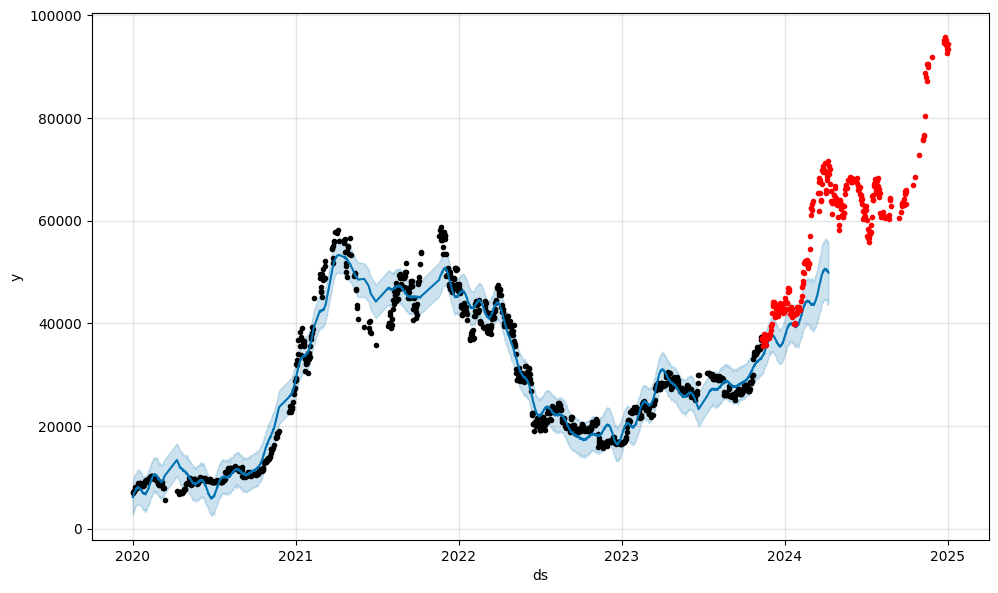

In [36]:
fig1 = model_no_outliers.plot(predict)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [37]:
df_predict = predict[['ds','yhat']]
df_compare = pd.merge(df_teste, df_predict, on='ds')
df_compare

,ds,y,yhat
0,2023-11-11,37138.050781,33371.542522
1,2023-11-12,37054.519531,33642.360588
2,2023-11-13,36502.355469,33665.317230
3,2023-11-14,35537.640625,33851.948874
4,2023-11-15,37880.582031,34138.777429
...,...,...,...
131,2024-04-04,68508.843750,50264.431689
132,2024-04-05,67837.640625,50371.162373
133,2024-04-06,68896.109375,50175.250679
134,2024-04-07,69362.554688,50172.888923


For me, it's the same as the model with outliers, but let's see the RSE

In [38]:
mse = np.mean((df_compare['y'] - df_compare['yhat'])**2)
rse = np.sqrt(np.mean((df_compare['y'] - df_compare['yhat'])**2))
print(f'MSE: {mse}')
print(f'RSE: {rse}')

MSE: 99657560.17368767
RSE: 9982.863325403572


The model with outliers is slightly closer to the actual values.

## Final Model

In [39]:
np.random.seed(4550)

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365, freq='D')
predict = model.predict(future)

00:23:48 - cmdstanpy - INFO - Chain [1] start processing
00:23:49 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
fig = plot_plotly(model, predict)
fig.update_layout(width=1700, height=900)
fig.show()

Conclusion: The model is very close to reality. The price of Bitcoin today in May is 96,277.24, and the model predicted about 108,382.10, which gives a difference of 12,104.86. This error happened because the model uses past data, and in 2025, there was the case of Trump's tariffs, which caused a big drop in Bitcoin's price. In the end, it's up to us to improve the models so that, like in Isaac Asimov's Foundation book, we can predict not only numbers but also future social events using math.

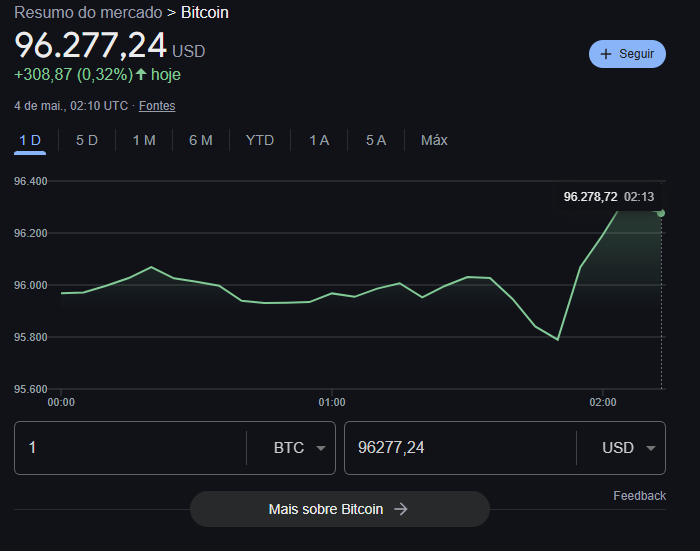